### Metropolis-Hastings Algorithm

In [35]:
mu = 3
sigma = 10
def qsample():
    return np.random.normal(mu,sigma)
def q(x):
#     return np.random.rand()
#     return np.array(1)
    return np.exp(-(x-mu)**2/(sigma**2))
def p(x):
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3)
def hm(n=10000):
    sample = np.zeros(n)
    sample[0] = 0.5
    for i in range(n-1):
        q_s = qsample()
        u = np.random.rand()
        if u < min(1, (p(q_s)*q(sample[i]))/(p(sample[i])*q(q_s))):
            sample[i+1] = q_s
        else:
            sample[i+1] = sample[i]
    return sample

C:\Temp\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


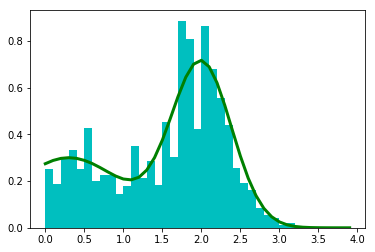

In [37]:
x = np.arange(0,4,0.1)
realdata = p(x)
N=10000
sample = hm(N)
plt.plot(x,realdata,'g',lw=3)
plt.plot(x,q(x),'r')
plt.hist(sample,bins=x,normed=1,fc='c')
plt.show()

### Rejection Sampling

In [29]:
from pylab import *
from numpy import *

def qsample():
    return random.rand()*4.

def p(x):
    return 0.3*exp(-(x-0.3)**2) + 0.7* exp(-(x-2.)**2/0.3) 

def rejection(nsamples):
    
#     M = 0.75#0.8
    samples = zeros(nsamples,dtype=float)
    count = 0
    for i in range(nsamples):
        accept = False
        while not accept:
            x = qsample()
            u = random.rand()*M
            if u<p(x):
                accept = True
                samples[i] = x
            else: 
                count += 1
    print(count) 
    return samples


375460


C:\Temp\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


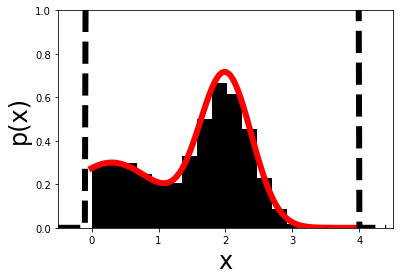

In [30]:
x = arange(0,4,0.01)
x2 = arange(-0.5,4.5,0.1)
realdata = 0.3*exp(-(x-0.3)**2) + 0.7* exp(-(x-2.)**2/0.3)
M=10
box = ones(len(x2))*M#0.8
box[:5] = 0
box[-5:] = 0
plot(x,realdata,'k',color="r",lw=6)
plot(x2,box,'k--',lw=6)

samples = rejection(10000)

hist(samples,15,normed=1,fc='k')
xlabel('x',fontsize=24)
ylabel('p(x)',fontsize=24)
axis([-0.5,4.5,0,1])
show()